# This project aimed  to build and train a Convolutional Neural Network (CNN) from scratch to classify 60,000 color images from the CIFAR-10 dataset into 10 object categories

In [1]:
# import all necessary libraries
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

In [2]:
# load CIFAR10 data
(xtrain, ytrain), (xtest, ytest) = cifar10.load_data()

Data Understanding

In [3]:
# check shape of data
print(f"shape of training data: {xtrain.shape}")
print(f"shape of validation data: {xtest.shape}")

shape of training data: (50000, 32, 32, 3)
shape of validation data: (10000, 32, 32, 3)


Data Preprocessing

In [4]:
# typecasting of data
xtrain = xtrain.astype("float32")
xtest = xtest.astype("float32")

In [5]:
# normalize data
xtrain = xtrain / 255.0
xtest = xtest / 255.0

Model Building

In [6]:
# creating sequential model
model = Sequential()

# add convolutional layers
model.add(Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# add flatten layer
model.add(Flatten())

# add fully dense layer
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [8]:
history = model.fit(xtrain, ytrain, epochs=20, validation_data=(xtest, ytest), verbose=1)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.3051 - loss: 1.8537 - val_accuracy: 0.5129 - val_loss: 1.3217
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.5415 - loss: 1.2891 - val_accuracy: 0.6152 - val_loss: 1.0710
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6209 - loss: 1.0952 - val_accuracy: 0.6541 - val_loss: 0.9613
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6610 - loss: 0.9743 - val_accuracy: 0.6874 - val_loss: 0.8954
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.6928 - loss: 0.8774 - val_accuracy: 0.6960 - val_loss: 0.8674
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7207 - loss: 0.8099 - val_accuracy: 0.7106 - val_loss: 0.8334
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7354 - loss: 0.7632 - val_accuracy: 0.7148 - val_loss: 0.8240
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7487 - loss: 0.724

In [9]:
loss, accuracy = model.evaluate(xtest, ytest)
print(f"Log loss: {loss}")
print(f"accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7232 - loss: 0.9600
Log loss: 0.9625927805900574
accuracy: 0.7225000262260437


Data Visualization

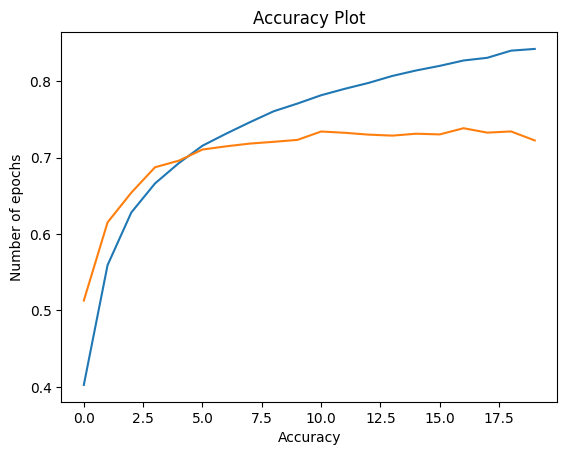

In [10]:
plt.plot(history.history["accuracy"], label="Training accuracy")
plt.plot(history.history["val_accuracy"], label="Validation accuracy")
plt.xlabel("Accuracy")
plt.ylabel("Number of epochs")
plt.title("Accuracy Plot")
plt.show()

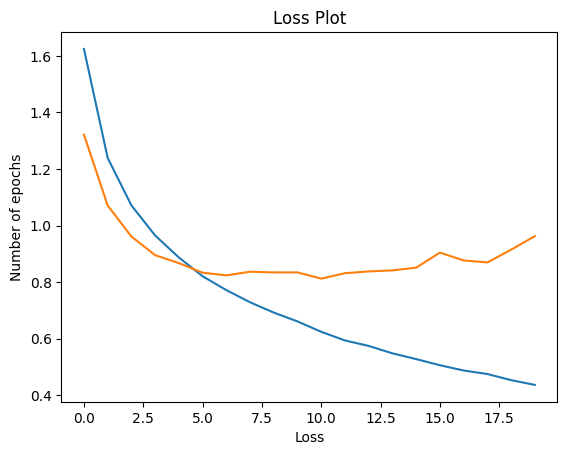

In [11]:
plt.plot(history.history["loss"], label="Training loss")
plt.plot(history.history["val_loss"], label="Validation loss")
plt.xlabel("Loss")
plt.ylabel("Number of epochs")
plt.title("Loss Plot")
plt.show()